In [1]:
from fastai.vision import *

from fastai.vision.data import ImageDataLoaders
from fastai.vision.learner import cnn_learner
import torchvision.models as models
from fastai.vision.all import *


In [2]:
data='cordata/cc/train'
tes=ImageDataLoaders.from_folder(data,train=".",valid_pct=0.2,item_tfms=RandomResizedCrop(128, min_scale=0.35),size=512, bs=4, seed=24,batch_tfms=Normalize.from_stats(*imagenet_stats))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [3]:
learn=cnn_learner(tes,models.resnet34)

C:\Users\kumar\anaconda3\lib\site-packages\fastai\vision\learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [4]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,time
0,1.402105,0.908295,00:07
1,1.330641,0.835284,00:02
2,1.114153,0.590926,00:02
3,1.182018,0.728287,00:02
4,1.051491,0.530807,00:02
5,0.973002,0.811462,00:02
6,1.008928,0.727271,00:02
7,0.894299,0.762176,00:02
8,0.859177,0.904352,00:02
9,0.900854,0.704003,00:02


In [5]:
learn.unfreeze()

SuggestedLRs(valley=9.120108734350652e-05)

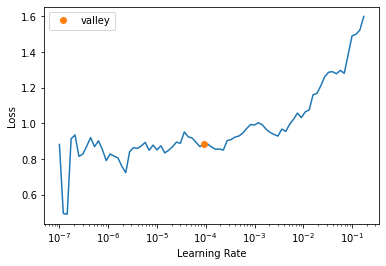

In [6]:
learn.lr_find()

In [7]:
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,time
0,0.761259,0.681223,00:04
1,0.790612,0.664693,00:04
2,0.931823,0.788762,00:04
3,0.889760,0.696687,00:04
4,0.908222,0.847097,00:04
5,0.842173,0.777690,00:04
6,0.791236,0.860400,00:04
7,0.665502,0.903747,00:04
8,0.685717,0.705741,00:04
9,0.730923,0.705092,00:04


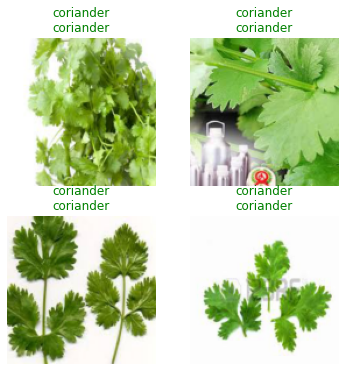

In [8]:
learn.show_results()

In [9]:
datatest='cordata/cc/test/coriander/coriander_001.jpg'

learn.predict(datatest)


('coriander', TensorBase(0), TensorBase([0.9195, 0.0805]))

In [10]:
import os
from os import listdir
folder_dir='cordata/cc/test/coriander'
err=0
count=0
for images in os.listdir(folder_dir):
    count+=1
    pred,idx,out=learn.predict('cordata/cc/test/coriander/'+images)
    if pred!='coriander':
        err+=1
print(err,count)

8 29
